## Fantasy Score Predictor

# Data Preprocessing

In [2]:
from datetime import datetime
import pandas as pd
import numpy as np

matches = pd.read_csv("Data/full_match_dat_all_countries.csv")

In [3]:
matches.head()


,Country,Date,Player,Mins,Opp Team,Pos,Gls,Ast,PKwon,PK,...,TklW,CrdY,CrdR,OG,GA,Saves,Save%,PK Non SO Conceded,PK SO scorer,GK PK SO saves
0,Argentina,2020-10-08,Lautaro Martínez,75,Ecuador,FW,0,0,NaN,0,...,1.0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,Argentina,2020-10-08,Lucas Alario,15,Ecuador,FW,0,0,NaN,0,...,0.0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
2,Argentina,2020-10-08,Lucas Ocampos,83,Ecuador,AM,0,0,NaN,0,...,1.0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
3,Argentina,2020-10-08,Nicolás Domínguez,7,Ecuador,MF,0,0,NaN,0,...,0.0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
4,Argentina,2020-10-08,Lionel Messi,90,Ecuador,AM,1,0,NaN,1,...,2.0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN


Shortening the list of Positions in my dataset to just be FWD, MID, DEF, GK

FWD = Striker, Winger, Attacking Midfield

MID = LM, RM, CM, DM

DEF = CB, WB, LB, RB

GK = Goalkeeper

If they played multiple I looked at the specific player and made a judgment call based on their primary position

In [4]:
np.unique(matches.loc[:,'Pos'])

array(['AM', 'AM,CM', 'AM,DM', 'AM,FW', 'AM,FW,RW', 'AM,LM', 'AM,LW',
       'AM,LW,CM', 'AM,LW,RW', 'AM,RW', 'AM,RW,RM', 'AM,WB', 'CB',
       'CB,LB', 'CB,LM', 'CB,RB', 'CM', 'CM,AM', 'CM,AM,LM', 'CM,CB',
       'CM,DM', 'CM,DM,LM', 'CM,FW', 'CM,LB', 'CM,LM', 'CM,LM,LW',
       'CM,RB,DM', 'CM,RM', 'CM,RW', 'DF', 'DF,FW', 'DF,MF', 'DM',
       'DM,AM', 'DM,CB', 'DM,CM', 'DM,LM', 'DM,RB', 'DM,RM', 'DM,RW',
       'FW', 'FW,AM', 'FW,CB', 'FW,CM', 'FW,LM', 'FW,LW', 'FW,LW,RW',
       'FW,MF', 'FW,RB', 'FW,RM', 'FW,RW', 'GK', 'LB', 'LB,CB', 'LB,FW',
       'LB,LM', 'LB,LW', 'LB,RB', 'LB,RM', 'LB,WB', 'LB,WB,LM', 'LM',
       'LM,AM', 'LM,CM', 'LM,DM', 'LM,FW', 'LM,LB', 'LM,LW', 'LM,RM',
       'LM,RM,CM', 'LM,RW', 'LM,RW,AM', 'LM,RW,RM', 'LW', 'LW,AM',
       'LW,CM', 'LW,CM,DM', 'LW,CM,LM', 'LW,FW', 'LW,LB', 'LW,LB,WB',
       'LW,LM', 'LW,RM', 'LW,RM,LM', 'LW,RM,RW', 'LW,RW', 'LW,RW,RM',
       'MF', 'RB', 'RB,CB', 'RB,LB', 'RB,RM', 'RB,RW', 'RB,WB', 'RM',
       'RM,AM,LM', 'RM,CM', '

In [5]:
matches.loc[matches['Pos']=='AM','Pos'] = "FWD"
matches.loc[matches['Pos']=='AM,CM','Pos'] = "MID"
matches.loc[matches['Pos']=='AM,DM','Pos'] = "MID"
matches.loc[matches['Pos']=='AM,FW','Pos'] = "FWD"
matches.loc[matches['Pos']=='AM,FW,RW','Pos'] = "FWD"
matches.loc[matches['Pos']=='AM,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='AM,LW','Pos'] = "FWD"
matches.loc[matches['Pos']=='AM,LW,CM','Pos'] = "FWD"
matches.loc[matches['Pos']=='AM,LW,RW','Pos'] = "FWD"
matches.loc[matches['Pos']=='AM,RW','Pos'] = "FWD"
matches.loc[matches['Pos']=='AM,RW,RM','Pos'] = "FWD"
matches.loc[matches['Pos']=='AM,WB','Pos'] = "MID"
matches.loc[matches['Pos']=='CB','Pos'] = "DEF"
matches.loc[matches['Pos']=='CB,LB','Pos'] = "DEF"
matches.loc[matches['Pos']=='CB,LM','Pos'] = "DEF"
matches.loc[matches['Pos']=='CB,RB','Pos'] = "DEF"
matches.loc[matches['Pos']=='CM','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,AM','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,AM,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,CB','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,DM','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,DM,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,FW','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,LB','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,LM,LW','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,RB,DM','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,RM','Pos'] = "MID"
matches.loc[matches['Pos']=='CM,RW','Pos'] = "MID"
matches.loc[matches['Pos']=='DF','Pos'] = "DEF"
matches.loc[matches['Pos']=='DF,FW','Pos'] = "DEF"
matches.loc[matches['Pos']=='DF,MF','Pos'] = "DEF"
matches.loc[matches['Pos']=='DM','Pos'] = "MID"
matches.loc[matches['Pos']=='DM,CB','Pos'] = "MID"
matches.loc[matches['Pos']=='DM,CM','Pos'] = "MID"
matches.loc[matches['Pos']=='DM,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='DM,RB','Pos'] = "DEF"
matches.loc[matches['Pos']=='DM,RM','Pos'] = "MID"
matches.loc[matches['Pos']=='DM,RW','Pos'] = "MID"
matches.loc[matches['Pos']=='DM,AM','Pos'] = "MID"
matches.loc[matches['Pos']=='FW','Pos'] = "FWD"
matches.loc[matches['Pos']=='FW,AM','Pos'] = "FWD"
matches.loc[matches['Pos']=='FW,CB','Pos'] = "FWD"
matches.loc[matches['Pos']=='FW,CM','Pos'] = "FWD"
matches.loc[matches['Pos']=='FW,LM','Pos'] = "FWD"
matches.loc[matches['Pos']=='FW,LW','Pos'] = "FWD"
matches.loc[matches['Pos']=='FW,LW,RW','Pos'] = "FWD"
matches.loc[matches['Pos']=='FW,MF','Pos'] = "FWD"
matches.loc[matches['Pos']=='FW,RB','Pos'] = "FWD"
matches.loc[matches['Pos']=='FW,RM','Pos'] = "FWD"
matches.loc[matches['Pos']=='FW,RW','Pos'] = "FWD"
matches.loc[matches['Pos']=='LB','Pos'] = "DEF"
matches.loc[matches['Pos']=='LB,CB','Pos'] = "DEF"
matches.loc[matches['Pos']=='LB,FW','Pos'] = "DEF"
matches.loc[matches['Pos']=='LB,LM','Pos'] = "DEF"
matches.loc[matches['Pos']=='LB,LW','Pos'] = "DEF"
matches.loc[matches['Pos']=='LB,RB','Pos'] = "DEF"
matches.loc[matches['Pos']=='LB,RM','Pos'] = "DEF"
matches.loc[matches['Pos']=='LB,WB','Pos'] = "DEF"
matches.loc[matches['Pos']=='LB,WB,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='LB,WB,RM','Pos'] = "DEF"
matches.loc[matches['Pos']=='LM','Pos'] = "MID"
matches.loc[matches['Pos']=='LM,AM','Pos'] = "MID"
matches.loc[matches['Pos']=='LM,CM','Pos'] = "MID"
matches.loc[matches['Pos']=='LM,DM','Pos'] = "MID"
matches.loc[matches['Pos']=='LM,LB','Pos'] = "MID"
matches.loc[matches['Pos']=='LM,LW','Pos'] = "FWD"
matches.loc[matches['Pos']=='LM,FW','Pos'] = "FWD"
matches.loc[matches['Pos']=='LM,RM','Pos'] = "MID"
matches.loc[matches['Pos']=='LM,RM,CM','Pos'] = "MID"
matches.loc[matches['Pos']=='LM,RW','Pos'] = "FWD"
matches.loc[matches['Pos']=='LM,RW,AM','Pos'] = "FWD"
matches.loc[matches['Pos']=='LM,RW,RM','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,AM','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,CM','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,CM,DM','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,CM,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='LW,RW','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,RW,RM','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,FW','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,LB,WB','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,LM','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,LB','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,RM','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,RM,LM','Pos'] = "FWD"
matches.loc[matches['Pos']=='LW,RM,RW','Pos'] = "MID"
matches.loc[matches['Pos']=='MF','Pos'] = "MID"
matches.loc[matches['Pos']=='RB','Pos'] = "DEF"
matches.loc[matches['Pos']=='RB,CB','Pos'] = "DEF"
matches.loc[matches['Pos']=='RB,LB','Pos'] = "DEF"
matches.loc[matches['Pos']=='RB,RM','Pos'] = "DEF"
matches.loc[matches['Pos']=='RB,RW','Pos'] = "DEF"
matches.loc[matches['Pos']=='RB,WB','Pos'] = "DEF"
matches.loc[matches['Pos']=='RM','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,AM,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,CM','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,CM,AM','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,DM','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,FW','Pos'] = "FWD"
matches.loc[matches['Pos']=='RM,FW,LW','Pos'] = "FWD"
matches.loc[matches['Pos']=='RM,LB','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,LM,FW','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,LW','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,LW,RW','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,RB','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,RW','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,RW,CM','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,RW,LM','Pos'] = "MID"
matches.loc[matches['Pos']=='RM,RW,LW','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,AM','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,AM,DM','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,CM','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,FW','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,FW,LW','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,LB,RM','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,LM','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,LW','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,LW,LM','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,RB','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,RB,AM','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,RB,LB','Pos'] = "FWD"
matches.loc[matches['Pos']=='RW,RM','Pos'] = "FWD"
matches.loc[matches['Pos']=='WB','Pos'] = "DEF"
matches.loc[matches['Pos']=='WB,AM','Pos'] = "FWD"
matches.loc[matches['Pos']=='WB,CB','Pos'] = "DEF"
matches.loc[matches['Pos']=='WB,CM,RB','Pos'] = "DEF"
matches.loc[matches['Pos']=='WB,LB','Pos'] = "DEF"
matches.loc[matches['Pos']=='WB,RB','Pos'] = "DEF"

In [6]:
np.unique(matches.loc[:,'Pos'])

array(['DEF', 'FWD', 'GK', 'MID'], dtype=object)

Creating the per 90 metrics

In [7]:
#since in the tables sometimes the stat is left blank even though they played
matches = matches.fillna(0)
matches['Mins per 90'] = matches['Mins'] / 90

stats_to_normalize = ['Gls', 'Ast', 'Shots', 'SoT', 'CrdY', 'CrdR', 'GA', 'Saves']

for stat in stats_to_normalize:
    if stat in matches.columns:
        matches[f'{stat}_per_90'] = matches[stat] / matches['Mins per 90']


Calculating the fantasy points each match

In [8]:
fantasy_pt = {
    'App':1,
    'Min':1,
    'Ast':3,
    'CrdY':-1,
    'CrdR':-3,
    'OG':-2,
    'PK Won':2,
    'Pen Con':-1,
    'GK DEF Clean':5,
    'Add Gls Con':-1,
    'GK Gls':9,
    'Pen Save':3,
    'Every 3 Saves':1,
    'DEF Gls':7,
    'MID Clean':1,
    'MID Gls':6,
    'Every 3 Tkls':1,
    'FWD Gls':5,
    'Every 2 FWD SoT':1
}

fant_pts = []

for i in range(len(matches)):
    pt = 0
    player = matches.loc[i,:]
    
    if player['Mins'] > 0:
        pt += fantasy_pt['App']
    if player['Mins'] >= 60:
        pt += fantasy_pt['Min']
    if player['Ast'] > 0:
        pt += player['Ast']*fantasy_pt['Ast']
    if player['CrdY'] > 0:
        pt += player['CrdY']*fantasy_pt['CrdY']
    if player['CrdR'] > 0:
        pt += player['CrdR']*fantasy_pt['CrdR']
    if player['OG'] > 0:
        pt += player['OG']*fantasy_pt['OG']
    if player['PKwon'] > 0:
        pt += player['PKwon']*fantasy_pt['PK Won']
    if player['PK Non SO Conceded'] > 0:
        pt += player['PK Non SO Conceded']*fantasy_pt['Pen Con']
    if player['GA'] == 0 and (player['Pos'] == 'GK' or player['Pos'] == 'DEF'):
        pt += fantasy_pt['GK DEF Clean']
    if player['GA'] >= 1:
        pt += (player['GA']-1)*fantasy_pt['Add Gls Con']
    if player['Pos'] == 'GK' and player['Gls'] >= 1:
        pt += player['Gls']*fantasy_pt['GK Gls']
    if player['Pos'] == 'GK':
        pt += (player['Saves']-player['PK Non SO Conceded'])*fantasy_pt['Pen Save']
    if player['Saves'] >= 3:
        saves_by3 = player['Saves']%3
        pt += saves_by3 * fantasy_pt['Every 3 Saves']
    if player['Pos'] == 'DEF' and player['Gls'] > 0:
        pt += player['Gls']*fantasy_pt['DEF Gls']   
    if player['Pos'] == 'MID' and player['GA'] == 0:
        pt += fantasy_pt['MID Clean']
    if player['Pos'] == 'MID' and player['Gls'] > 0:
        pt += player['Gls']*fantasy_pt['MID Gls']
    if player['Pos'] == 'FWD' and player['Gls'] > 0:
        pt += player['Gls']*fantasy_pt['FWD Gls']
    if player['Pos'] == 'FWD' and player['SoT'] >= 2:
        sot_by2 = player['SoT']%2
        pt += sot_by2*fantasy_pt['Every 2 FWD SoT']
    fant_pts.append(pt)
    
matches['Fantasy Points'] = fant_pts

Add opponent strength metric and some lagging average stat to account for form of the player

In [9]:
team_ratings = pd.read_csv('Data/elo_ratings.csv')

team_ratings.head()

,Country,Rank,ELO,Rank_2024,ELO_2024,Rank_2023,ELO_2023,Rank_2022,ELO_2022,Rank_2021,ELO_2021,Rank_2020,ELO_2020
0,Afghanistan,181,1033,176.0,1086.0,178.0,1076.0,177.0,1097.0,171.0,1145.0,175.0,1140.0
1,Albania,50,1664,53.0,1635.0,54.0,1631.0,70.0,1543.0,65.0,1586.0,69.0,1556.0
2,Algeria,40,1718,48.0,1685.0,39.0,1723.0,42.0,1705.0,26.0,1798.0,34.0,1746.0
3,Andorra,179,1083,177.0,1083.0,172.0,1102.0,174.0,1109.0,183.0,1058.0,185.0,1037.0
4,Angola,70,1566,67.0,1567.0,109.0,1383.0,101.0,1404.0,112.0,1359.0,117.0,1349.0


In [10]:
teams = team_ratings['Country'].unique()

for team in matches['Opp Team'].unique():
    if team not in teams:
        print(team)

Korea Republic
Türkiye
Côte d'Ivoire
Congo DR
IR Iran
Republic of Ireland
Kyrgyz Republic
China PR
Korea DPR
St. Kitts and Nevis


In [11]:
team_ratings['Country'] = team_ratings['Country'].replace({
    'South Korea': 'Korea Republic',
    'Turkey': 'Türkiye',
    'Ivory Coast':"Côte d'Ivoire",
    'DR Congo': 'Congo DR',
    'Iran': 'IR Iran',
    'Ireland': 'Republic of Ireland',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'China': 'China PR',
    'North Korea': 'Korea DPR',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis'})

Gonna add a column to matches that has the correct ELO rating for that country at that time frame

In [12]:
cor_elos = []
opp_elos = []

for i in range(len(matches)):
    team = matches.loc[i,'Country']
    match_date = matches.loc[i,'Date']
    
    opp = matches.loc[i,'Opp Team']
    
    #get year of match date
    format_string = "%Y-%m-%d"
    match_year = datetime.strptime(match_date,format_string).year
    
    #filter team_ratings to get the rating for that team at that date
    team_elo = team_ratings[team_ratings['Country'] == team]

    opp_elo = team_ratings[team_ratings['Country'] == opp]
    
    yr_diff = 2025 - match_year
    
    if yr_diff == 0:
        rating = team_elo['ELO'].values[0]
        opp_rat = opp_elo['ELO'].values[0]
    elif yr_diff == 1:
        rating = team_elo['ELO_2024'].values[0] 
        opp_rat = opp_elo['ELO_2024'].values[0]
    elif yr_diff == 2:
        rating = team_elo['ELO_2023'].values[0] 
        opp_rat = opp_elo['ELO_2023'].values[0]
    elif yr_diff == 3:
        rating = team_elo['ELO_2022'].values[0]
        opp_rat = opp_elo['ELO_2022'].values[0]
    elif yr_diff == 4:
        rating = team_elo['ELO_2021'].values[0]
        opp_rat = opp_elo['ELO_2021'].values[0]
    else:
        #since the latest date is 2020
        rating = team_elo['ELO_2020'].values[0]
        opp_rat = opp_elo['ELO_2020'].values[0]
    
    cor_elos.append(int(rating))
    opp_elos.append(int(opp_rat))

matches['ELO Rating'] = cor_elos
matches['Opp ELO Rating'] = opp_elos

#getting ELO diff
matches['ELO Diff'] = matches['ELO Rating'] - matches['Opp ELO Rating']

In [13]:
pd.set_option('display.max_columns', None)
matches.head()

,Country,Date,Player,Mins,Opp Team,Pos,Gls,Ast,PKwon,PK,PKatt,Shots,SoT,TklW,CrdY,CrdR,OG,GA,Saves,Save%,PK Non SO Conceded,PK SO scorer,GK PK SO saves,Mins per 90,Gls_per_90,Ast_per_90,Shots_per_90,SoT_per_90,CrdY_per_90,CrdR_per_90,GA_per_90,Saves_per_90,Fantasy Points,ELO Rating,Opp ELO Rating,ELO Diff
0,Argentina,2020-10-08,Lautaro Martínez,75,Ecuador,FWD,0,0,0.0,0,0,1.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,0.0,0.0,1.200000,0.000000,0.0,0.0,0.0,0.0,2.0,1994,1826,168
1,Argentina,2020-10-08,Lucas Alario,15,Ecuador,FWD,0,0,0.0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1994,1826,168
2,Argentina,2020-10-08,Lucas Ocampos,83,Ecuador,FWD,0,0,0.0,0,0,1.0,1.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.922222,0.0,0.0,1.084337,1.084337,0.0,0.0,0.0,0.0,2.0,1994,1826,168
3,Argentina,2020-10-08,Nicolás Domínguez,7,Ecuador,MID,0,0,0.0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.077778,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,1994,1826,168
4,Argentina,2020-10-08,Lionel Messi,90,Ecuador,FWD,1,0,0.0,1,1,3.0,1.0,2.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,3.000000,1.000000,0.0,0.0,0.0,0.0,7.0,1994,1826,168


Creating last 5 game averages for some stats

In [14]:
from sklearn.preprocessing import OneHotEncoder

matches.columns

matches['Gls per 90 Last 5'] = matches.groupby(['Country', 'Player'])['Gls_per_90'].rolling(5, closed='left').mean().reset_index(level=[0,1], drop=True)
matches['Shots per 90 Last 5'] = matches.groupby(['Country', 'Player'])['Shots_per_90'].rolling(5, closed='left').mean().reset_index(level=[0,1], drop=True)
matches['SoT per 90 Last 5'] = matches.groupby(['Country', 'Player'])['SoT_per_90'].rolling(5, closed='left').mean().reset_index(level=[0,1], drop=True)
matches['CrdY per 90 Last 5'] = matches.groupby(['Country', 'Player'])['CrdY_per_90'].rolling(5, closed='left').mean().reset_index(level=[0,1], drop=True)
matches['CrdR per 90 Last 5'] = matches.groupby(['Country', 'Player'])['CrdR_per_90'].rolling(5, closed='left').mean().reset_index(level=[0,1], drop=True)
matches['GA per 90 Last 5'] = matches.groupby(['Country', 'Player'])['GA_per_90'].rolling(5, closed='left').mean().reset_index(level=[0,1], drop=True)
matches['Saves per 90 Last 5'] = matches.groupby(['Country', 'Player'])['Saves_per_90'].rolling(5, closed='left').mean().reset_index(level=[0,1], drop=True)
matches['Fantasy Pts Last 5'] = matches.groupby(['Country', 'Player'])['Fantasy Points'].rolling(5, closed='left').mean().reset_index(level=[0,1], drop=True)

#creating idicator variables for the position they play
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 

one_hot_encoded_array = encoder.fit_transform(matches[['Pos']])
one_hot_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out(['Pos']))

matches = pd.concat([matches, one_hot_df], axis=1)


In [15]:
matches = matches.sort_values(['Country', 'Player', 'Date'])  # ensure ordered

matches = matches.groupby(['Country', 'Player']).apply(
    lambda df: df.iloc[5:]
).reset_index(drop=True)

matches = matches.sort_values(['Country', 'Date'])

C:\Users\tolan\AppData\Local\Temp\ipykernel_17576\462828944.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches = matches.groupby(['Country', 'Player']).apply(


Dropping players with Nans as they don't have enough history to play. Likely a fill in player for a friendly. In World Cup the best starters are played so we'd want to predict the scores for these players

In [16]:
matches_cleaned = matches.dropna(subset=[
    'Gls per 90 Last 5',
    'Shots per 90 Last 5',
    'SoT per 90 Last 5',
    'CrdY per 90 Last 5',
    'CrdR per 90 Last 5',
    'GA per 90 Last 5',
    'Saves per 90 Last 5',
    'Fantasy Pts Last 5'
])

predictors = ['Mins','ELO Diff', 'Gls per 90 Last 5', 'Shots per 90 Last 5',
       'SoT per 90 Last 5', 'CrdY per 90 Last 5', 'CrdR per 90 Last 5',
       'GA per 90 Last 5', 'Saves per 90 Last 5', 'Fantasy Pts Last 5',
       'Pos_DEF', 'Pos_FWD', 'Pos_GK', 'Pos_MID']

pred = matches_cleaned.loc[:,predictors]

y = matches_cleaned[['Fantasy Points']]

In [17]:
matches.head()

,Country,Date,Player,Mins,Opp Team,Pos,Gls,Ast,PKwon,PK,PKatt,Shots,SoT,TklW,CrdY,CrdR,OG,GA,Saves,Save%,PK Non SO Conceded,PK SO scorer,GK PK SO saves,Mins per 90,Gls_per_90,Ast_per_90,Shots_per_90,SoT_per_90,CrdY_per_90,CrdR_per_90,GA_per_90,Saves_per_90,Fantasy Points,ELO Rating,Opp ELO Rating,ELO Diff,Gls per 90 Last 5,Shots per 90 Last 5,SoT per 90 Last 5,CrdY per 90 Last 5,CrdR per 90 Last 5,GA per 90 Last 5,Saves per 90 Last 5,Fantasy Pts Last 5,Pos_DEF,Pos_FWD,Pos_GK,Pos_MID
350,Argentina,2021-06-08,Lautaro Martínez,90,Colombia,FWD,0,0,0.0,0,0,4.0,3.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,4.0,3.0,0.0,0.0,0.000000,0.0,3.0,2101,1904,197,2.485714,2.800000,2.4,0.000000,0.0,0.000000,0.0,4.2,0.0,1.0,0.0,0.0
401,Argentina,2021-06-08,Leandro Paredes,90,Colombia,MID,1,0,0.0,0,0,1.0,1.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,8.0,2101,1904,197,0.000000,0.531924,0.0,0.739623,0.0,0.295082,0.0,2.0,0.0,0.0,0.0,1.0
451,Argentina,2021-06-08,Lionel Messi,90,Colombia,FWD,0,0,0.0,0,0,3.0,3.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,3.0,3.0,0.0,0.0,0.000000,0.0,3.0,2101,1904,197,0.200000,3.000000,1.0,0.000000,0.0,0.000000,0.0,4.8,0.0,1.0,0.0,0.0
757,Argentina,2021-06-08,Rodrigo De Paul,90,Colombia,MID,0,1,0.0,0,0,0.0,0.0,2.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,6.0,2101,1904,197,0.000000,0.400000,0.4,0.400000,0.0,0.000000,0.0,3.8,0.0,0.0,0.0,1.0
247,Argentina,2021-06-14,Gonzalo Montiel,84,Chile,DEF,0,0,0.0,0,0,0.0,0.0,1.0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.0,0.0,0.0,0.0,0.0,0.0,1.071429,0.0,2.0,2101,1793,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0


## Starting training 

Linear Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(pred, y, test_size=.25, random_state=123)

linear = LinearRegression()

linear.fit(x_train, y_train)

yhat = linear.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, yhat))
r2 = r2_score(y_test,yhat)

print(f"RMSE: {rmse} | R2: {r2}")

RMSE: 3.165591261469799 | R2: 0.26471697468940314


In [19]:
results = y_test.copy()

results['Predicted'] = yhat
results['Player'] = matches_cleaned.loc[results.index, 'Player'].values
results['Pos'] = matches_cleaned.loc[results.index, 'Pos'].values
results

,Fantasy Points,Predicted,Player,Pos
4173,7.0,4.400012,Harry Kane,FWD
1374,2.0,3.308672,Vinicius Júnior,FWD
2681,2.0,1.715114,Richard Ríos,MID
9762,0.0,1.510791,Álvaro Morata,FWD
10772,1.0,-1.261190,Mauro Arambarri,MID
...,...,...,...,...
4274,4.0,4.811729,Jarrod Bowen,FWD
1671,2.0,3.729286,Jonathan Osorio,FWD
8830,3.0,2.409828,Pedro Neto,FWD
1574,14.0,4.133262,Derek Cornelius,DEF


Calculating error among Position

In [20]:
forwards = results.loc[results['Pos']=='FWD']
mid = results.loc[results['Pos']=='MID']
defenders = results.loc[results['Pos']=='DEF']
gk = results.loc[results['Pos']=='GK']

rmse_fwd = np.sqrt(mean_squared_error(forwards['Fantasy Points'],forwards['Predicted']))
rmse_mid = np.sqrt(mean_squared_error(mid['Fantasy Points'],mid['Predicted']))
rmse_def = np.sqrt(mean_squared_error(defenders['Fantasy Points'],defenders['Predicted']))
rmse_gk = np.sqrt(mean_squared_error(gk['Fantasy Points'],gk['Predicted']))

r2_fwd = r2_score(forwards['Fantasy Points'],forwards['Predicted'])
r2_mid = r2_score(mid['Fantasy Points'],mid['Predicted'])
r2_def = r2_score(defenders['Fantasy Points'],defenders['Predicted'])
r2_gk = r2_score(gk['Fantasy Points'],gk['Predicted'])

print("FWD:")
print(f"MSE: {rmse_fwd} | R2: {r2_fwd}")
print("\nMID:")
print(f"MSE: {rmse_mid} | R2: {r2_mid}")
print("\nDEF:")
print(f"MSE: {rmse_def} | R2: {r2_def}")
print("\nGk:")
print(f"MSE: {rmse_gk} | R2: {r2_gk}")

FWD:
MSE: 2.896401181277441 | R2: 0.20415686197418215

MID:
MSE: 2.519355812388107 | R2: 0.15958375644262812

DEF:
MSE: 3.162721982562082 | R2: 0.13918186826647228

Gk:
MSE: 5.743384798440928 | R2: 0.0005829965588096675


Better performance on MID but really stuggled with predicting GK

Checking for multicollinerity issues and which predictors had strongest correlation to Fantasy Points

In [21]:
corr_mat = pred.copy()
corr_mat['Fantasy Pt'] = matches_cleaned['Fantasy Points']
corr_mat.corr()

,Mins,ELO Diff,Gls per 90 Last 5,Shots per 90 Last 5,SoT per 90 Last 5,CrdY per 90 Last 5,CrdR per 90 Last 5,GA per 90 Last 5,Saves per 90 Last 5,Fantasy Pts Last 5,Pos_DEF,Pos_FWD,Pos_GK,Pos_MID,Fantasy Pt
Mins,1.000000,-0.033031,-0.091520,-0.122880,-0.104035,-0.019387,0.014741,-0.128421,0.164757,0.290299,0.156534,-0.250718,0.211375,-0.008205,0.309495
ELO Diff,-0.033031,1.000000,0.041509,0.058119,0.052177,-0.018183,-0.015152,-0.006574,-0.006360,0.096227,0.006065,0.011906,-0.003945,-0.017430,0.273538
Gls per 90 Last 5,-0.091520,0.041509,1.000000,0.387598,0.538860,0.274706,-0.012649,0.052972,-0.075313,0.129261,-0.190609,0.302266,-0.101896,-0.074365,-0.027219
Shots per 90 Last 5,-0.122880,0.058119,0.387598,1.000000,0.768892,0.087164,-0.012423,0.241738,-0.117757,-0.089359,-0.234630,0.321681,-0.159323,-0.016579,-0.054554
SoT per 90 Last 5,-0.104035,0.052177,0.538860,0.768892,1.000000,0.135779,-0.010864,0.139595,-0.078600,-0.014301,-0.191170,0.282251,-0.106344,-0.049080,-0.028010
CrdY per 90 Last 5,-0.019387,-0.018183,0.274706,0.087164,0.135779,1.000000,0.024655,0.067787,-0.038963,-0.076944,0.005244,-0.003697,-0.056664,0.030474,-0.035622
CrdR per 90 Last 5,0.014741,-0.015152,-0.012649,-0.012423,-0.010864,0.024655,1.000000,-0.011413,-0.005014,-0.013273,0.044200,-0.024930,-0.008967,-0.014413,-0.013123
GA per 90 Last 5,-0.128421,-0.006574,0.052972,0.241738,0.139595,0.067787,-0.011413,1.000000,-0.029883,-0.232009,-0.047601,0.048443,-0.084136,0.044501,-0.076208
Saves per 90 Last 5,0.164757,-0.006360,-0.075313,-0.117757,-0.078600,-0.038963,-0.005014,-0.029883,1.000000,0.572292,-0.131016,-0.148130,0.739111,-0.113188,0.278008
Fantasy Pts Last 5,0.290299,0.096227,0.129261,-0.089359,-0.014301,-0.076944,-0.013273,-0.232009,0.572292,1.000000,0.154593,-0.183598,0.558463,-0.276309,0.344604


Intersting to see from the matrix that Fantasy points and GK are pretty strongly correlated with .55. This could be due to the fact that this is a simpler process, in that its generally number of saves that determine their fantasy points. However, in our MSE and R2 GK did worse! 

We due have a potential multicollinerity issue with Shots and Shots on Target. Will try running a model with less variables to check performance

In [22]:
predictors = ['ELO Diff','Fantasy Pts Last 5','Pos_DEF', 'Pos_FWD', 'Pos_GK', 'Pos_MID']

pred = matches_cleaned.loc[:,predictors]

x_train, x_test, y_train, y_test = train_test_split(pred, y, test_size=.25, random_state=123)

linear = LinearRegression()

linear.fit(x_train, y_train)

yhat = linear.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, yhat))
r2 = r2_score(y_test,yhat)

print(f"MSE: {rmse} | R2: {r2}")

MSE: 3.2744167681691727 | R2: 0.21329343471404316


Very similar performance!

Let's try XGBoost since it generally improves model's performance on tabular data

In [23]:
import xgboost as xgb

boosted = xgb.XGBRegressor(objective='reg:squarederror',
                           n_estimators=500,
                            learning_rate=0.01,
                            max_depth=4,
                            subsample=0.8,
                            colsample_bytree=0.8,
                            reg_lambda=1.0,
                            reg_alpha=0.0,
                            random_state=123)

boosted.fit(x_train, y_train)
y_pred = boosted.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse} | R2: {r2}")

RMSE: 3.243449873076906 | R2: 0.2281031608581543


Trying lagging variables and more rolling windows since multicollinerity is less of an issue for Tree base methods

In [24]:
matches_new = matches.copy()

for col in ['Fantasy Points', 'Gls_per_90', 'Shots_per_90', 'Mins', 'SoT_per_90', 'GA_per_90', 'Saves_per_90']:
    matches_new[f'{col}_lag1'] = matches_new.groupby(['Country','Player'])[col].shift(1)
    matches_new[f'{col}_lag2'] = matches_new.groupby(['Country','Player'])[col].shift(2)
    matches_new[f'{col}_lag3'] = matches_new.groupby(['Country','Player'])[col].shift(3)

In [25]:
matches_cleaned_new = matches_new.dropna(subset=[
    'Gls per 90 Last 5',
    'Shots per 90 Last 5',
    'SoT per 90 Last 5',
    'CrdY per 90 Last 5',
    'CrdR per 90 Last 5',
    'GA per 90 Last 5',
    'Saves per 90 Last 5',
    'Fantasy Pts Last 5'
])

predictors = ['Mins','ELO Diff', 'Gls per 90 Last 5', 'Shots per 90 Last 5',
       'SoT per 90 Last 5', 'CrdY per 90 Last 5', 'CrdR per 90 Last 5',
       'GA per 90 Last 5', 'Saves per 90 Last 5', 'Fantasy Pts Last 5',
       'Pos_DEF', 'Pos_FWD', 'Pos_GK', 'Pos_MID','Fantasy Points_lag1',
       'Fantasy Points_lag2', 'Fantasy Points_lag3', 'Gls_per_90_lag1',
       'Gls_per_90_lag2', 'Gls_per_90_lag3', 'Shots_per_90_lag1',
       'Shots_per_90_lag2', 'Shots_per_90_lag3', 'Mins_lag1', 'Mins_lag2',
       'Mins_lag3', 'SoT_per_90_lag1', 'SoT_per_90_lag2', 'SoT_per_90_lag3',
       'GA_per_90_lag1', 'GA_per_90_lag2', 'GA_per_90_lag3',
       'Saves_per_90_lag1', 'Saves_per_90_lag2', 'Saves_per_90_lag3']

pred = matches_cleaned_new.loc[:,predictors]

y = matches_cleaned_new[['Fantasy Points']]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(pred, y, test_size=.25, random_state=123)

boosted = xgb.XGBRegressor(objective='reg:squarederror',
                           n_estimators=700,
                            learning_rate=0.005,
                            max_depth=4,
                            subsample=0.8,
                            colsample_bytree=0.8,
                            reg_lambda=1.0,
                            reg_alpha=0.0,
                            random_state=123)

boosted.fit(x_train, y_train)
y_pred = boosted.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse} | R2: {r2}")

RMSE: 3.1377640024188382 | R2: 0.27758723497390747


After some tuning we got our best performing model!

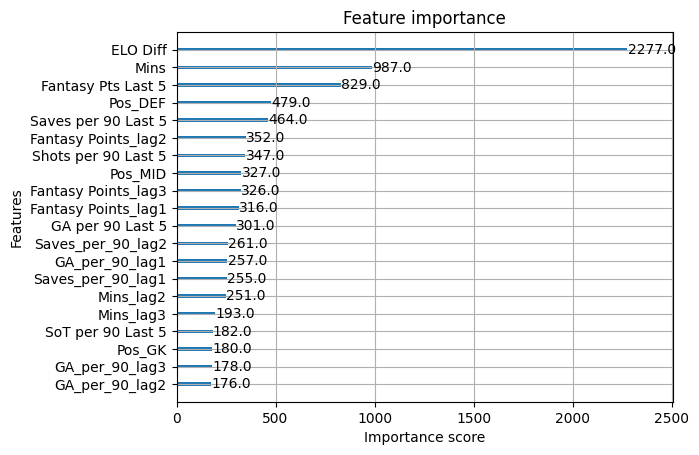

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(boosted, max_num_features=20)
plt.show()

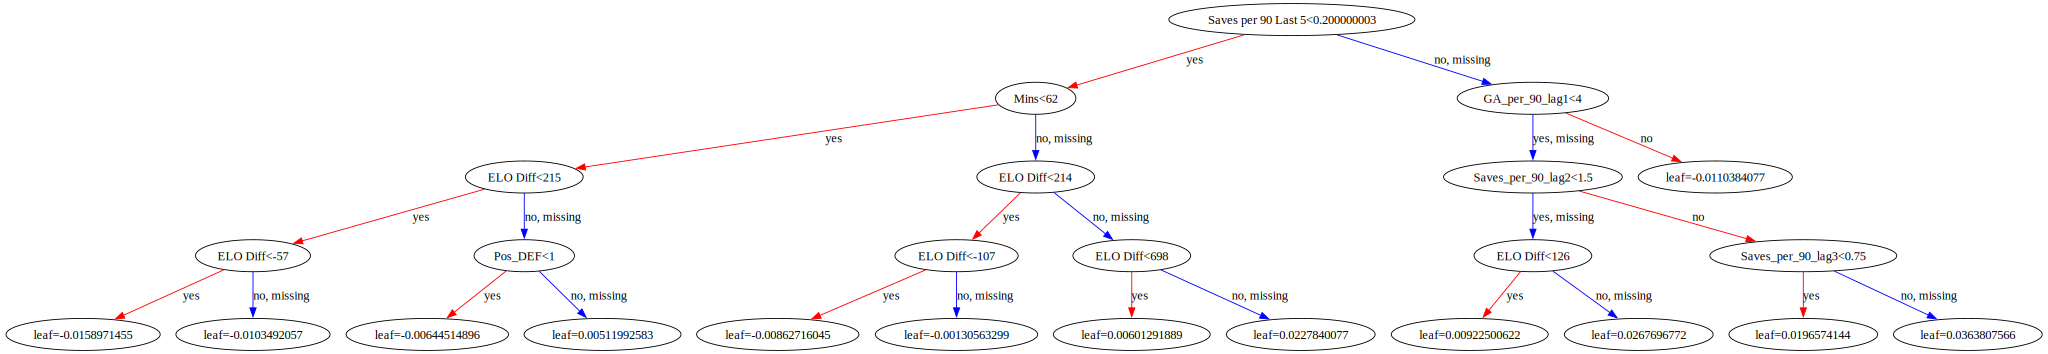

In [ ]:
from xgboost import to_graphviz
from IPython.display import display

# Render first tree as vector (SVG/PDF)
graph = to_graphviz(boosted, tree_idx=2,    )
display(graph)

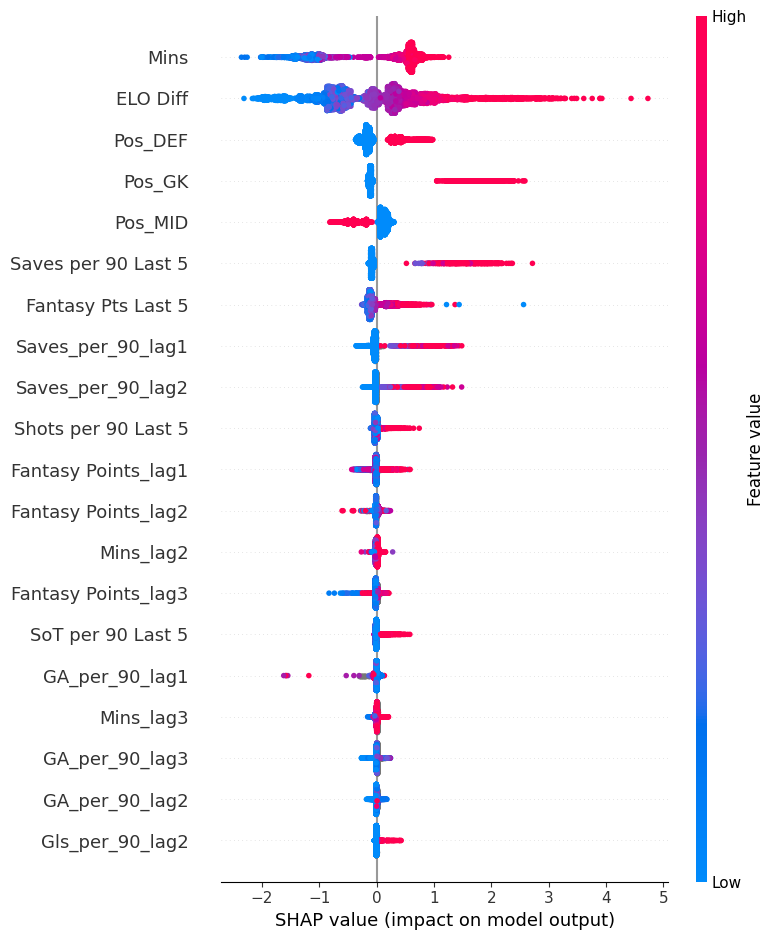

In [ ]:
import shap
explainer = shap.TreeExplainer(boosted)
shap_values = explainer.shap_values(x_train)

shap.summary_plot(shap_values, x_train)

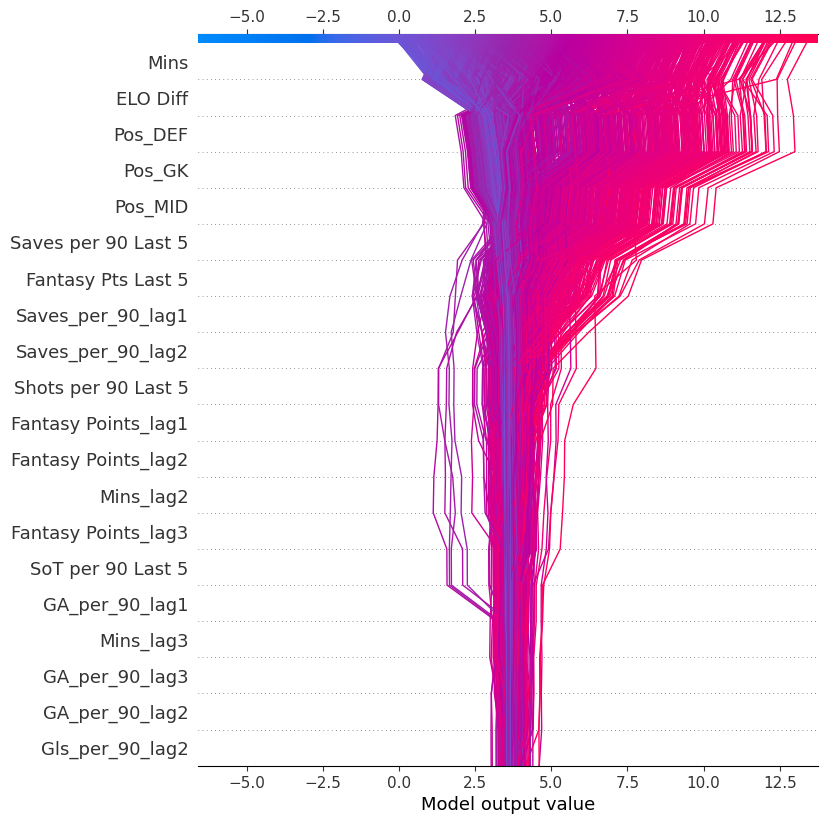

In [32]:
shap.decision_plot(explainer.expected_value, shap_values, x_train,ignore_warnings=True)